In [11]:
import sys
sys.path.append('..')
import pandas as pd
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from app import Color
from config import settings

In [13]:
colors = Color.query.all()
def parse_color(color): 
    col = color.as_dict()
    col['year'] = col['date'].year
    for c in settings.COLOR_LIST:
        cap_text = col['captured_text'].lower()
        if c in cap_text:
            col['color_word'] = c
            break
    return col

colors_parsed = [parse_color(color) for color in colors]
df = pd.DataFrame(colors_parsed)
pd.to_datetime(df['date'])


df.head()


,captured_text,case_id,color_word,context,date,hex,hsv,id,lab,lum,name_abbreviation,rgb,year
0,red book,5454223,red,prices defeats the usefulness of knowing the i...,1982-11-01,c0301e,"[0, 1, 191]",29311,"[43.282722, 55.782906, 44.6579]",9.007988,"Hayden’s Sport Center, Inc. v. Johnson","[191, 47, 29]",1982
1,black man,435728,black,"R. Wash in the suit instituted by George, a bl...",1825-12-01,242022,"[1, 0, 36]",3,"[12.888623, 2.352607, -0.69452816]",5.776529,Cornelius v. Wash,"[36, 32, 34]",1825
2,black man,435728,black,"1820, and decided in favor of George, the blac...",1825-12-01,242022,"[1, 0, 36]",4,"[12.888623, 2.352607, -0.69452816]",5.776529,Cornelius v. Wash,"[36, 32, 34]",1825
3,white male,435586,white,cause to be collected from all able-bodied fre...,1828-12-01,eee6d3,"[0, 0, 237]",6,"[91.34681, -0.31198972, 9.968518]",15.177331,Nance v. Howard,"[237, 229, 211]",1828
4,green-houses,435750,green,may remove from the land his hot-houses and gr...,1828-12-01,6b8c61,"[0, 0, 139]",7,"[54.75594, -20.239775, 19.500286]",11.357396,Adams v. Smith,"[106, 139, 96]",1828


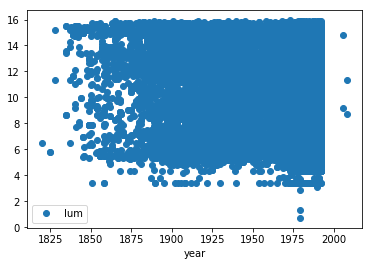

In [26]:
df.plot(x='year', y='lum', style='o')

In [4]:
# plot amount of red over the years

red = []
for idx, row in df.iterrows():
    captured_text = row.captured_text.lower().split(' ')
    if 'red' in captured_text:
        red.append(row)
red_df = pd.DataFrame(red)
red_df.head()

,captured_text,case_id,context,date,hex,hsv,id,lab,lum,name_abbreviation,rgb,year
0,red book,5454223,prices defeats the usefulness of knowing the i...,1982-11-01,c0301e,"[0, 1, 191]",29311,"[43.282722, 55.782906, 44.6579]",9.007988,"Hayden’s Sport Center, Inc. v. Johnson","[191, 47, 29]",1982
5,red cow,2482651,detinue.\nA declaration in detinue for “ a red...,1835-12-01,cf2128,"[1, 1, 207]",10,"[45.007565, 64.679565, 42.215393]",8.682005,Felt v. Williams,"[207, 32, 39]",1835
8,red cow,2482651,"Court by Williams against Felt, to recover a l...",1835-12-01,cf2128,"[1, 1, 207]",13,"[45.007565, 64.679565, 42.215393]",8.682005,Felt v. Williams,"[207, 32, 39]",1835
9,red cow,2482651,the cow claimed by the plaintiff “ was not a r...,1835-12-01,cf2128,"[1, 1, 207]",15,"[45.007565, 64.679565, 42.215393]",8.682005,Felt v. Williams,"[207, 32, 39]",1835
69,red oak stump,2569332,a west course to a white oak stump and a red o...,1848-12-01,cd3627,"[0, 1, 204]",116,"[46.612026, 57.8669, 44.0407]",9.452817,Sargeant ex rel. Huntington v. Kellogg,"[204, 54, 39]",1848


In [4]:
# plot amount of red over the years

black = []
for idx, row in df.iterrows():
    captured_text = row.captured_text.lower().split(' ')
    if 'black' in captured_text:
        black.append(row)
black_df = pd.DataFrame(black)
black_df.head()


white = []
for idx, row in df.iterrows():
    captured_text = row.captured_text.lower().split(' ')
    if 'white' in captured_text:
        white.append(row)
white_df = pd.DataFrame(white)
white_df.head()


gold = []
for idx, row in df.iterrows():
    captured_text = row.captured_text.lower().split(' ')
    if 'gold' in captured_text:
        gold.append(row)
gold_df = pd.DataFrame(gold)
gold_df.head()

,captured_text,case_id,context,date,hex,hsv,id,lab,lum,name_abbreviation,rgb,year
66,gold and silver,2563398,sheriff has no right to receive anything excep...,1847-12-01,deae70,"[0, 0, 221]",110,"[74.05293, 10.054146, 38.43047]",13.454152,Hood v. Moore,"[221, 173, 111]",1847
84,gold and silver,2577385,the bank required to be paid into the bank in ...,1850-12-01,deae70,"[0, 0, 221]",137,"[74.05293, 10.054146, 38.43047]",13.454152,Smith v. Dunlap,"[221, 173, 111]",1850
128,gold dust,2593665,"the presence of witness, twenty-five ounces of...",1856-06-01,d6b245,"[0, 1, 214]",211,"[73.986115, 1.2765048, 58.41888]",13.396615,Holmes v. Stateler,"[214, 178, 69]",1856
131,gold coin,438571,"Joseph R. Williams the sum of $161, in gold co...",1856-12-01,dcae3a,"[0, 1, 219]",218,"[73.43707, 5.239451, 62.62396]",13.314391,Bishop v. Williams,"[219, 174, 57]",1856
142,silver and gold,438701,examination of the acts of congress will show ...,1857-04-01,dad18a,"[0, 0, 217]",238,"[83.155685, -7.501354, 36.438396]",14.369893,People v. Dubois,"[217, 209, 138]",1857


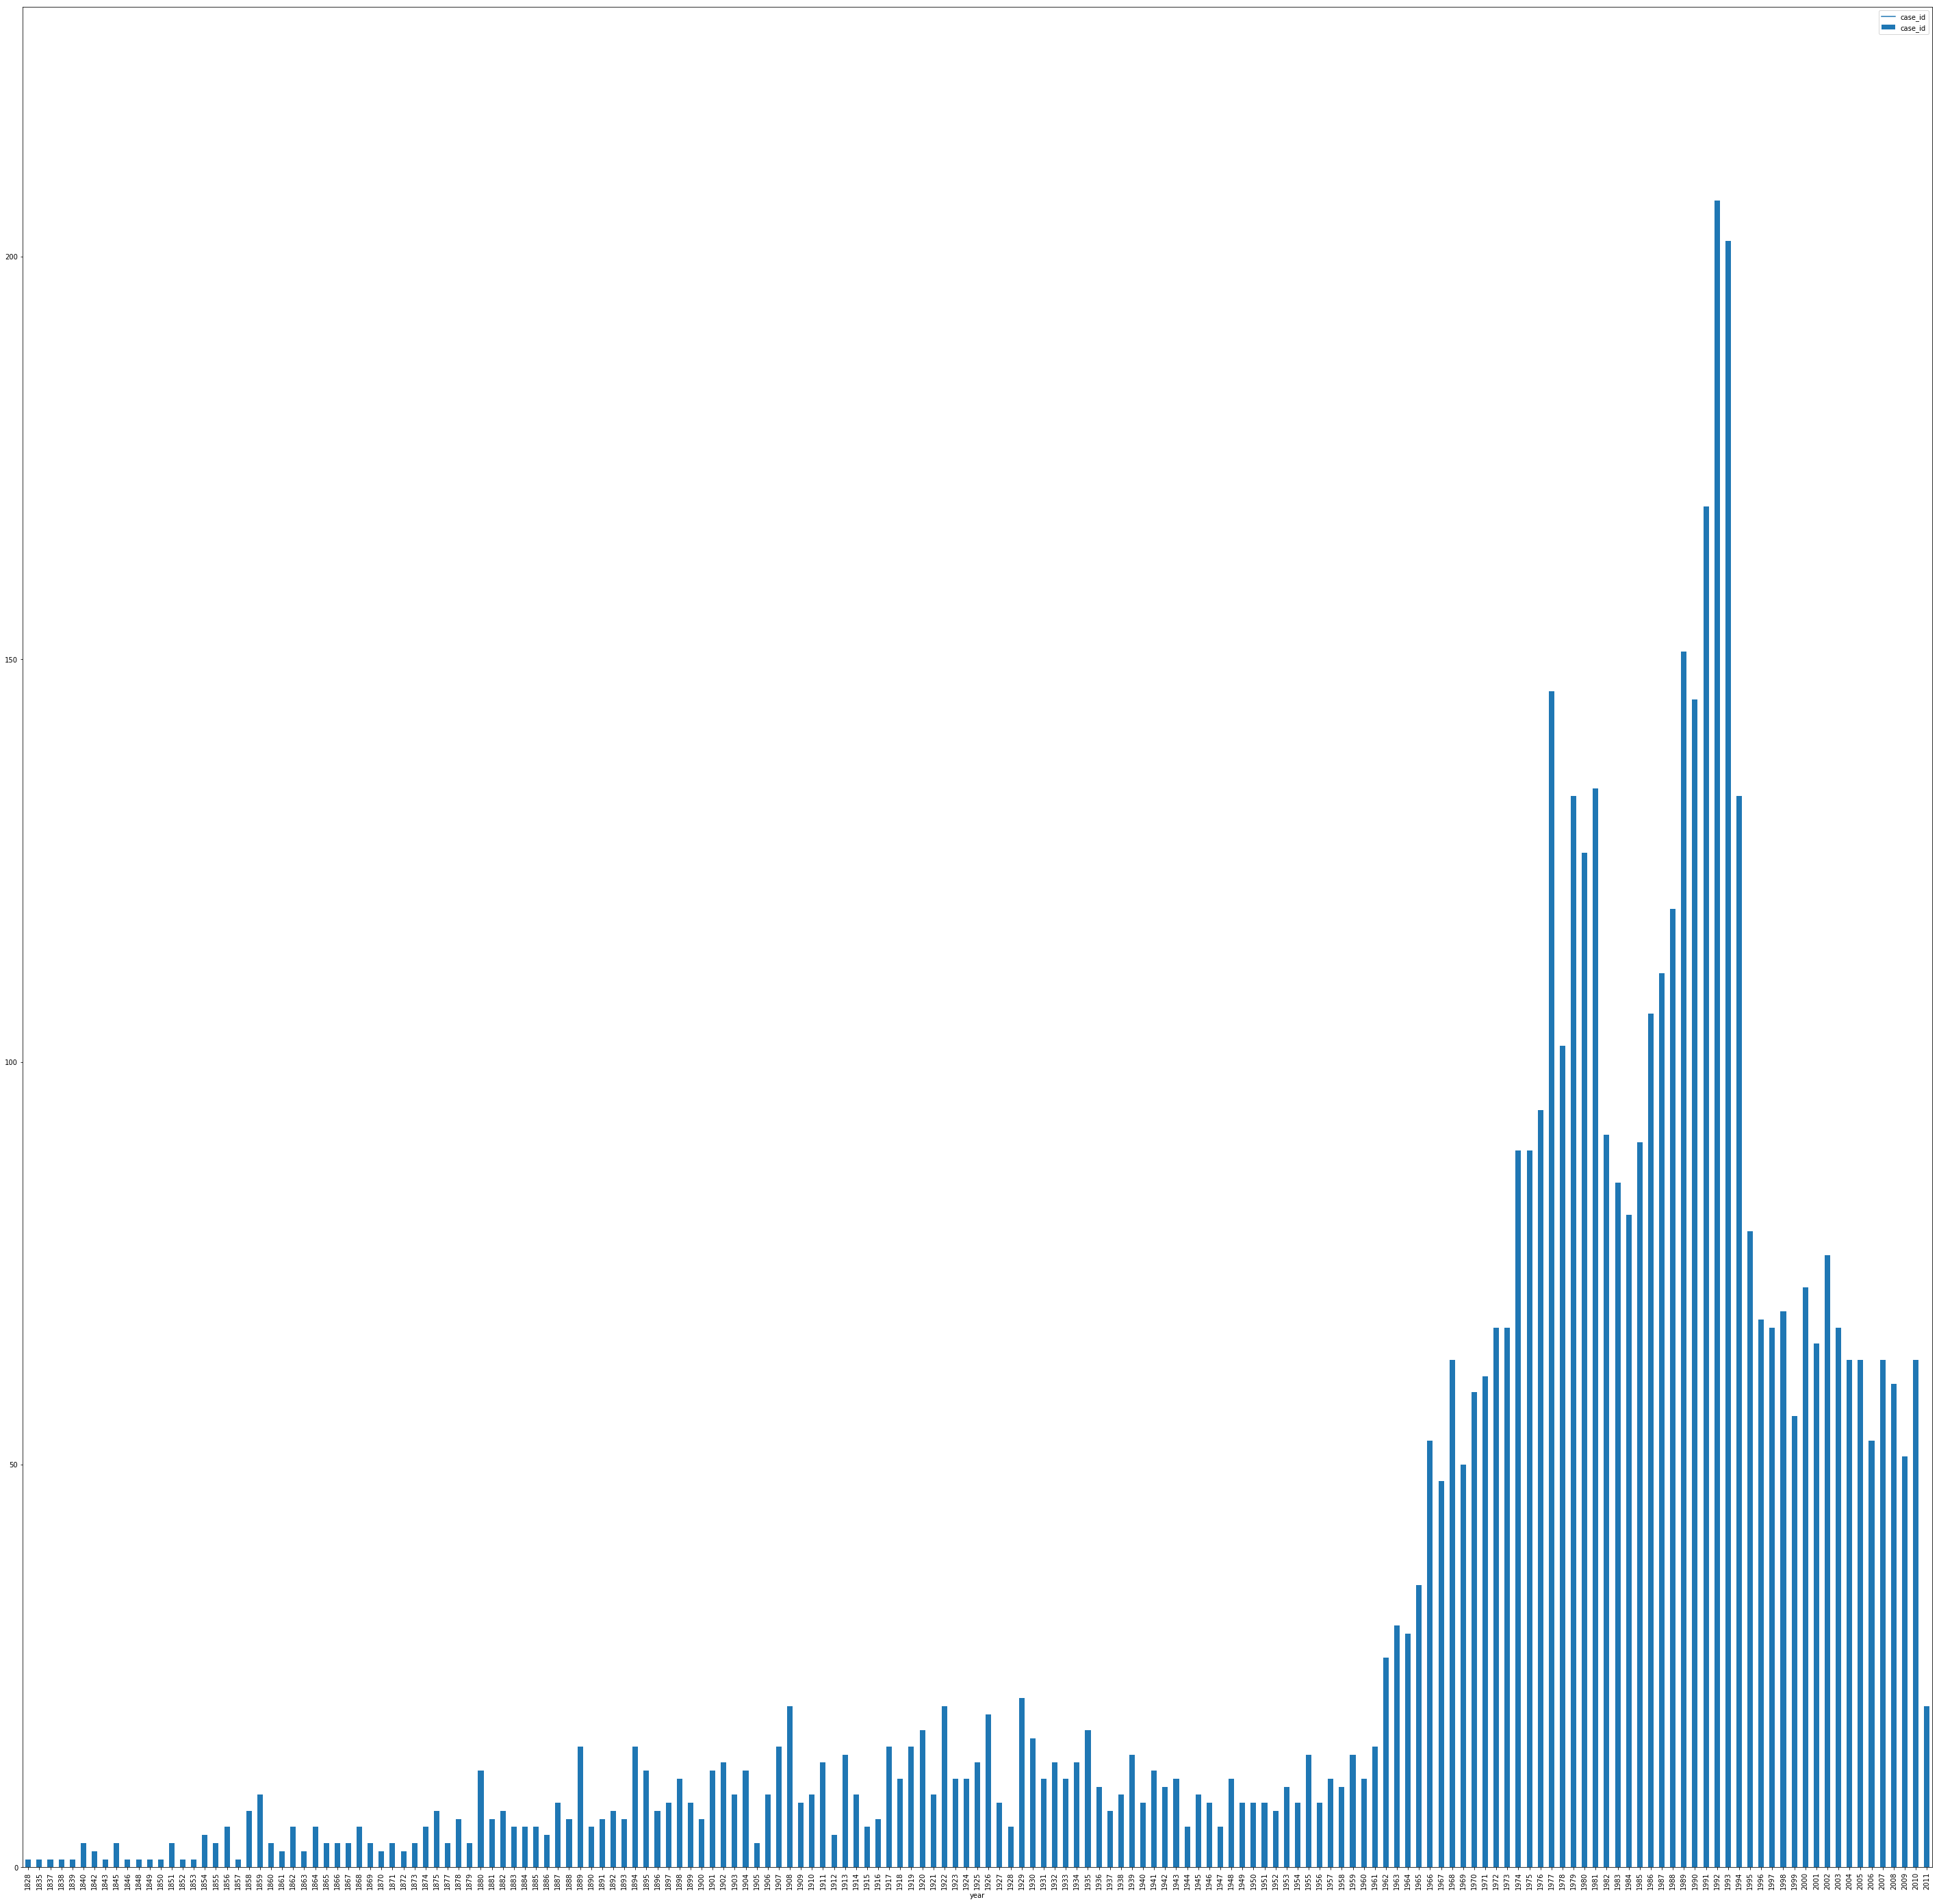

In [9]:
fig, ax = plt.subplots()
black_df.drop_duplicates('case_id')[['year', 'case_id']].groupby('year').count().plot(ax=ax, figsize=(50, 50))
white_df.drop_duplicates('case_id')[['year', 'case_id']].groupby('year').count().plot.bar(ax=ax)

In [66]:
idf = df.groupby(['year', 'color_word','case_id']).count().index
idf =idf.to_frame(index=False).groupby(['year', 'color_word']).count().reset_index()

for year in idf.year.unique():
    tmp = idf[(idf['year']==year)]# & 
    tmp = tmp[tmp['case_id']==tmp['case_id'].max(axis=0)]
    print(year)
    print(tmp[['color_word','case_id']])
# idf.groupby('year').aggregate(lambda x: x['year'], axis=1)

1820
  color_word  case_id
0      black        1
1825
  color_word  case_id
1      black        1
1828
  color_word  case_id
2      green        1
3      white        1
1835
  color_word  case_id
4        red        1
5      white        1
6     yellow        1
1837
   color_word  case_id
7       black        1
8        blue        1
9      silver        1
10      white        1
1838
   color_word  case_id
11        tan        1
1839
   color_word  case_id
13      white        2
1840
   color_word  case_id
18      white        3
1841
   color_word  case_id
19      black        1
1842
   color_word  case_id
21      white        2
1843
   color_word  case_id
22      black        2
1844
   color_word  case_id
25       aqua        1
26      brown        1
1845
   color_word  case_id
28      white        3
1846
   color_word  case_id
29      black        2
1847
   color_word  case_id
31       gold        1
1848
   color_word  case_id
32       gray        1
33      green        1
34        r

     color_word  case_id
1652      black      103
1986
     color_word  case_id
1669      black      131
1987
     color_word  case_id
1691      black      158
1988
     color_word  case_id
1710      black      129
1989
     color_word  case_id
1730      black      162
1990
     color_word  case_id
1751      black      151
1991
     color_word  case_id
1791      white      165
1992
     color_word  case_id
1795      black      228
1993
     color_word  case_id
1818      black      191
1994
     color_word  case_id
1836      black      156
1995
     color_word  case_id
1871      white       72
1996
     color_word  case_id
1875      black       68
1997
     color_word  case_id
1892      black       78
1998
     color_word  case_id
1909      black       91
1999
     color_word  case_id
1928      black       69
2000
     color_word  case_id
1947      black       94
2001
     color_word  case_id
1963      black       70
2002
     color_word  case_id
1980      black       79
2003
     color

# black_df=black_df.drop_duplicates('case_id')
year_df = black_df['year'].value_counts()
year_df.plot(x='year', style=['black'], figsize=(200, 200))


In [92]:
sorted_by_year = gold_df.sort_values('year')
# sorted_by_year.plot(x='year',y='count',figsize=(50,50),kind='bar')
# sorted_by_year.groupby('year')['count'].idxmax()
by_year = sorted_by_year['year'].value_counts()


21
14
13
13
10
8
8
8
7
7
7
7
7
7
6
6
6
6
6
6
6
6
6
5
5
5
5
5
5
5
5
5
5
5
4
4
4
4
4
4
4
4
4
4
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


In [24]:
df.case_id.unique()

array([5454223,  435728,  435586, ..., 1163763,  411686,  186473])

In [11]:
# year_df.plot(x='year', y='lum', kind='bar')

,captured_text,case_id,context,date,hex,hsv,id,lab,lum,name_abbreviation,rgb
0,174,174,174,174,174,174,174,174,174,174,174
5,3,3,3,3,3,3,3,3,3,3,3
8,3,3,3,3,3,3,3,3,3,3,3
9,3,3,3,3,3,3,3,3,3,3,3
69,1,1,1,1,1,1,1,1,1,1,1


In [17]:
tups = tuple(red_df['lab'])
for tup in tups:
    if tup and len(tup) == 2:
        print(tup)

In [14]:
colorio.CIELAB([61, 3, -47])

In [20]:
# https://matplotlib.org/examples/mplot3d/surface3d_demo.html
year_df.plot(x=[45.19835], y=[65.5544])

KeyError: '[45.19835] not in index'